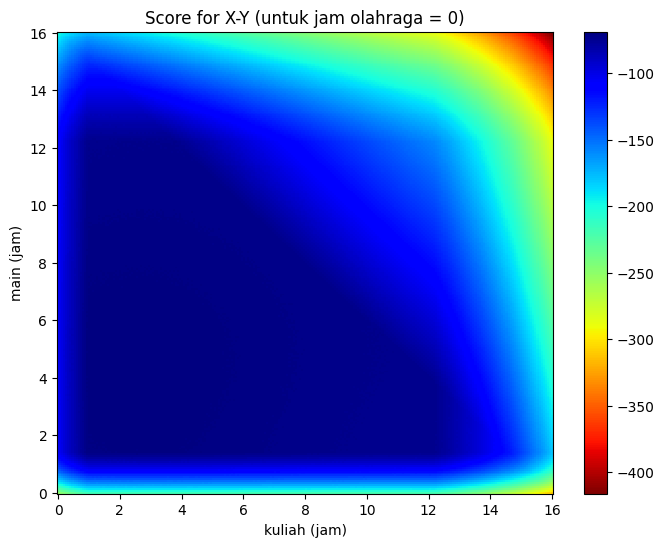

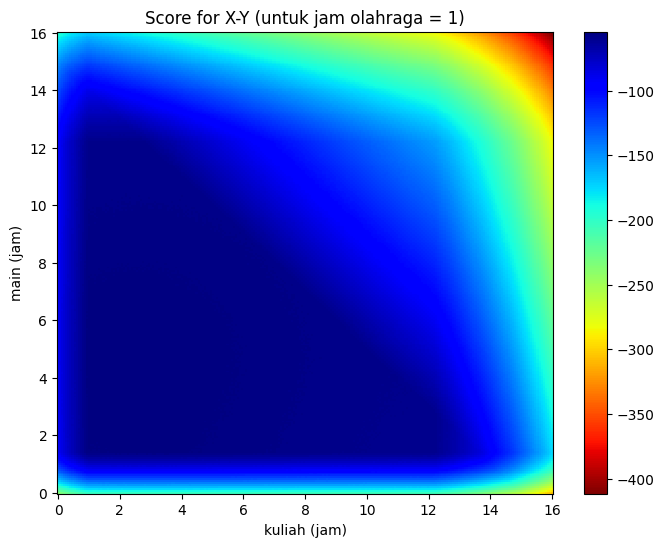

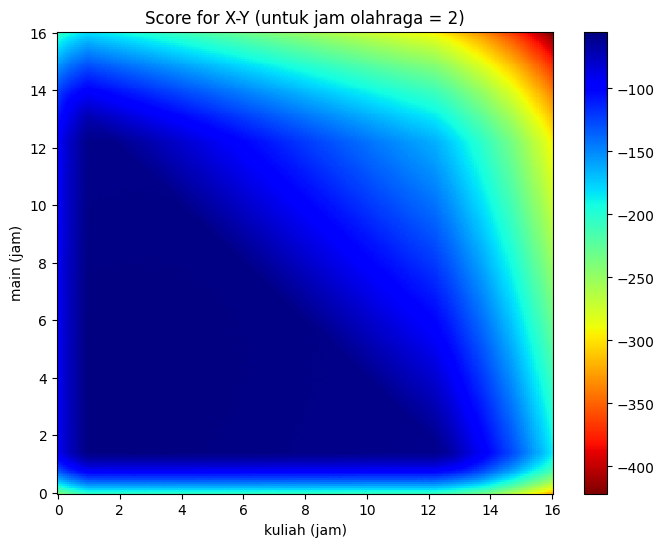

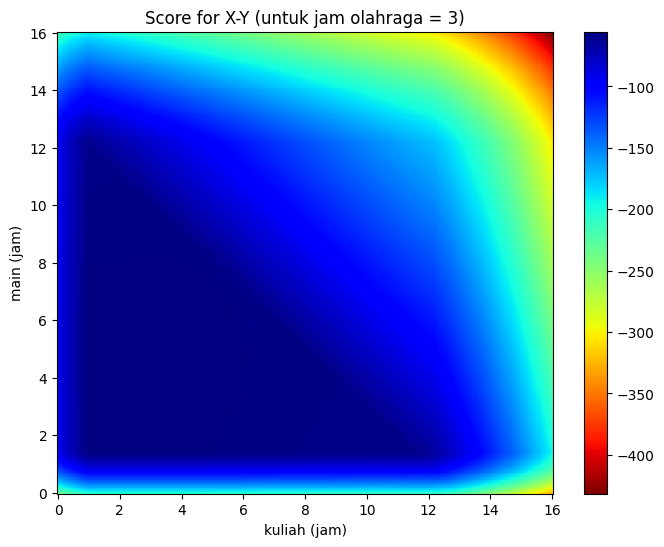

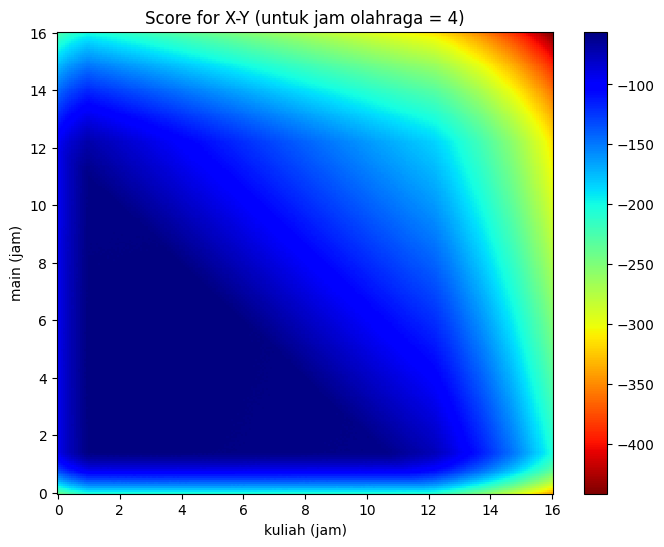

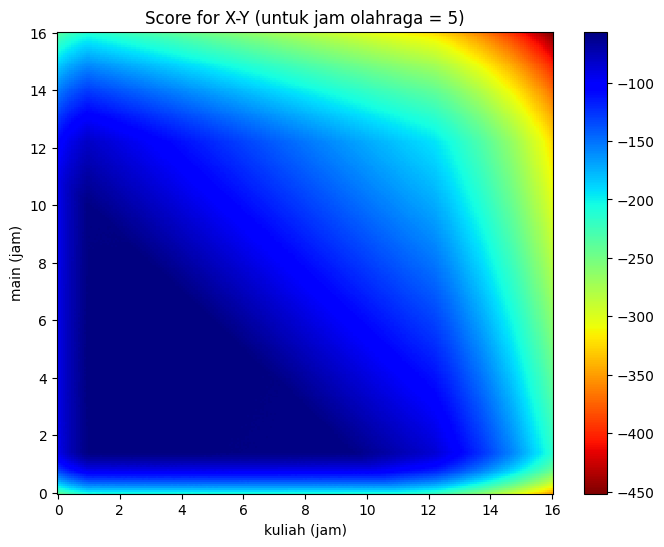

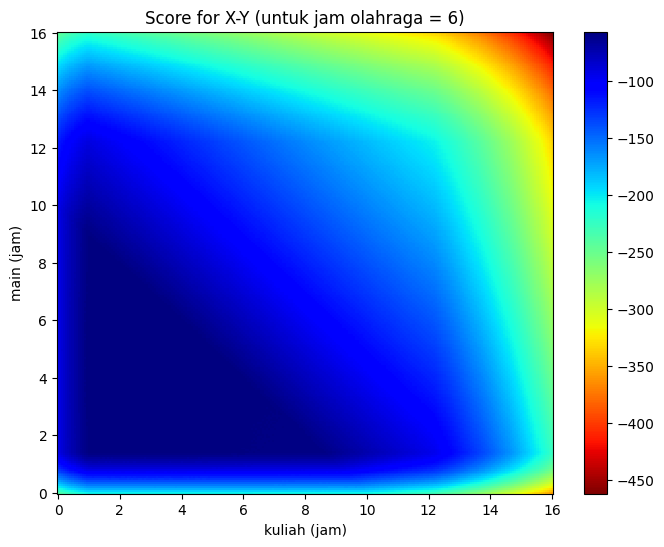

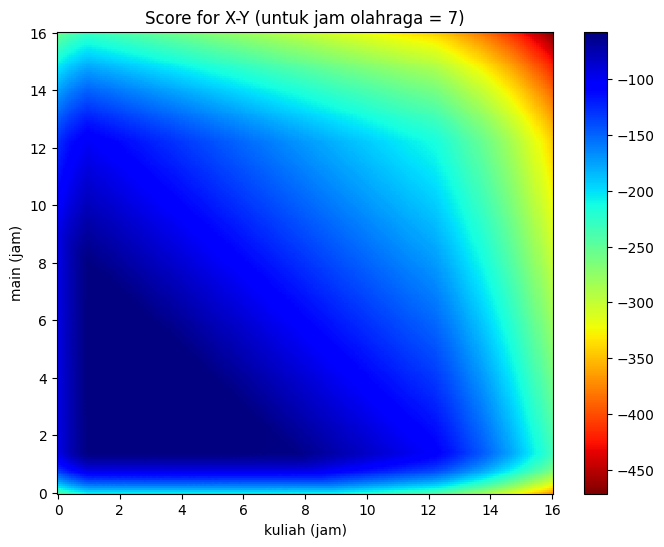

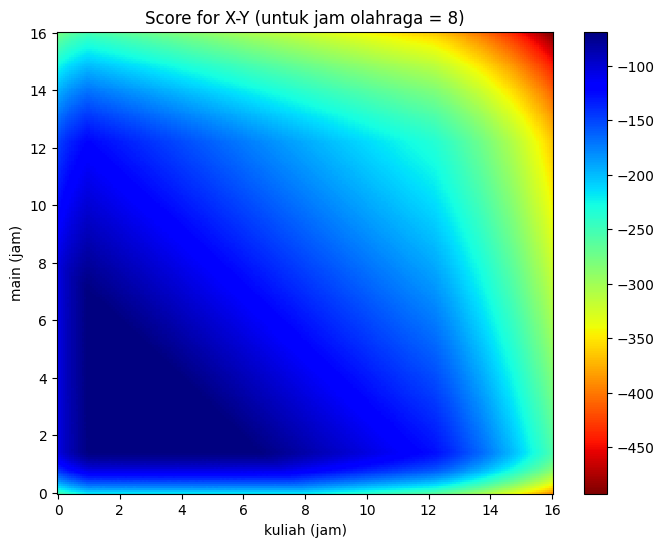

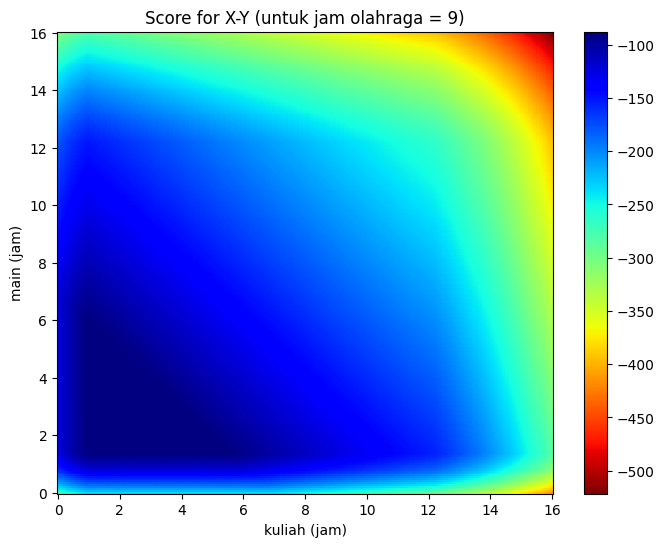

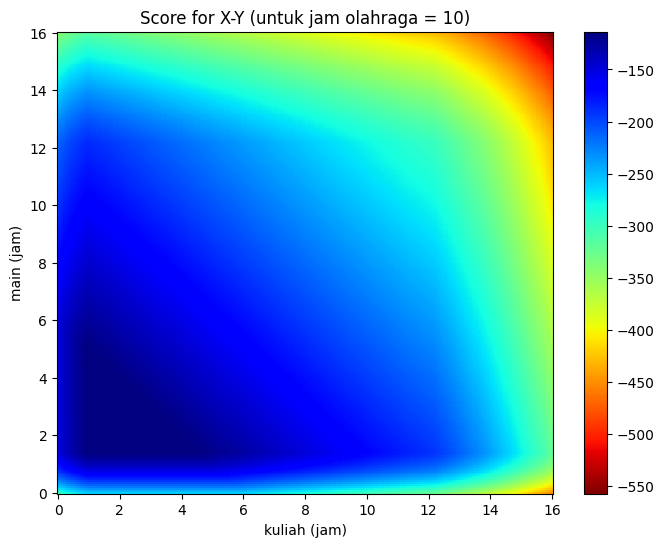

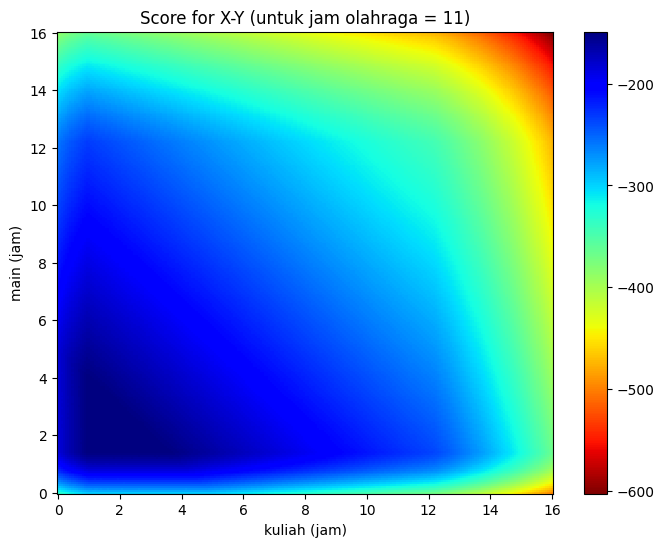

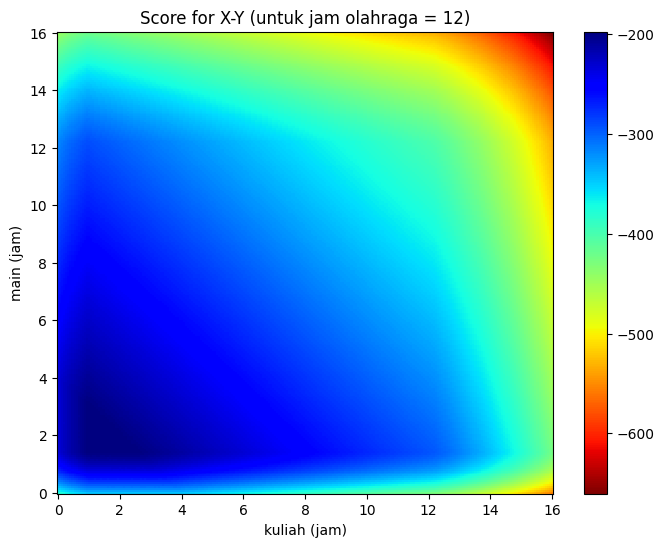

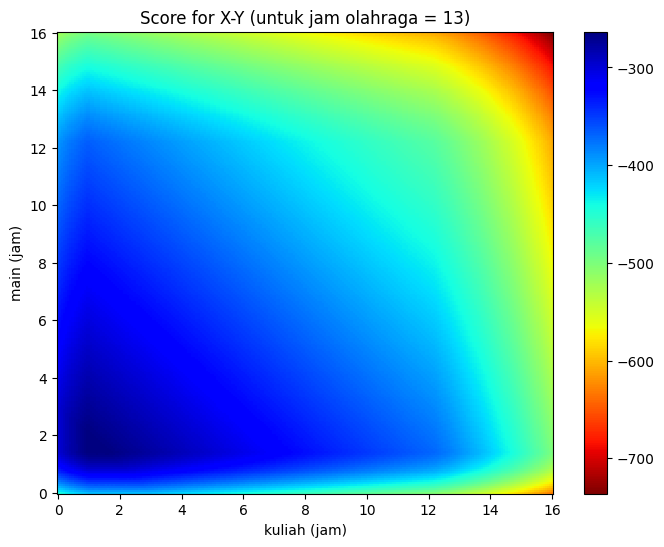

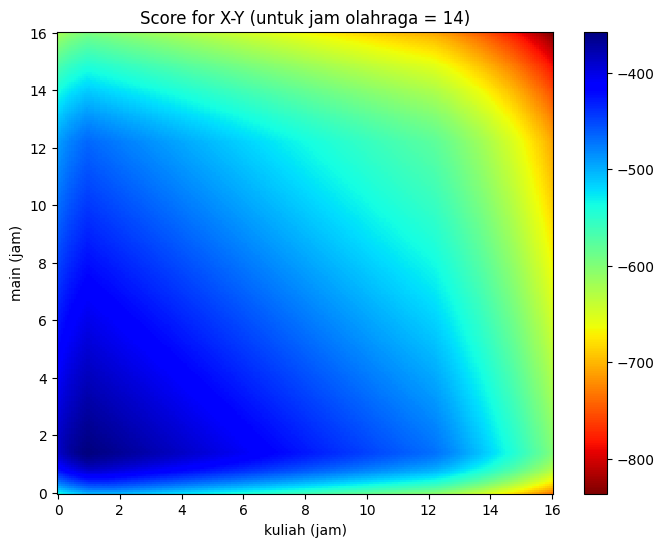

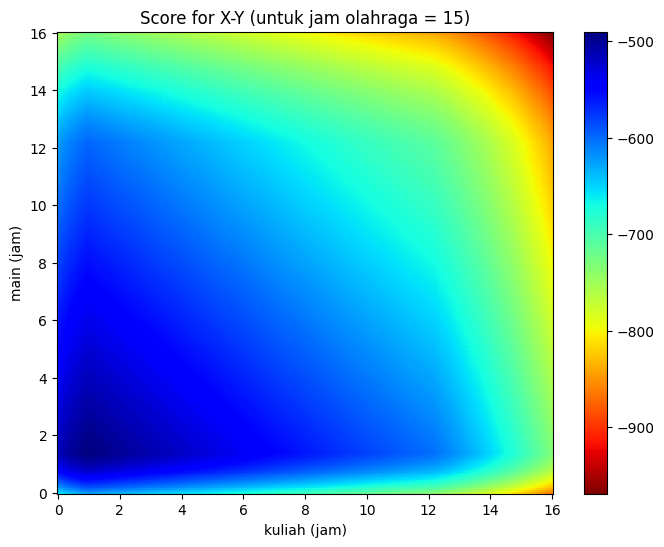

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

istirahat = 8 # istirahat yang cukup

# Grid setup
xmin, xmax = 0, 24-istirahat
ymin, ymax = 0, 24-istirahat
zmin, zmax = 0, 24-istirahat
res = 240
x = np.linspace(xmin, xmax, res) # kuliah
y = np.linspace(ymin, ymax, res) # main
z = np.linspace(zmin, zmax, res) # olahraga

# X-Y meshgrid, fix z at median value
X, Y = np.meshgrid(x, y)
for i in range(zmin, zmax):
    fixed_z = i

    kuliah_pref = np.exp(-((X - 4)**2) / 35)
    main_pref = np.exp(-((Y - 6)**2) / 35)
    exercise_pref = np.exp(-((fixed_z - 1)**2) / 25)

    total_waktu = X + Y + fixed_z
    total_penalty = np.exp((total_waktu / (24-istirahat)))

    unoptimised_kuliah = (
        math.e**3
        * np.maximum(np.exp(((X - 10)) / 3.2) - 1, 1)# kebanyakan lembur
        * np.maximum(np.exp(((2 - X)) / 1.5) - 1, 1)
    )
    unoptimised_main = (
        math.e**3
        * np.maximum(np.exp(((Y - 10)) / 3.2) - 1, 1)# kebanyakan main
        * np.maximum(np.exp(((2 - Y)) / 0.9) - 1, 1)
    )
    unoptimised_exercise = (
        math.e**3
        * np.maximum(np.exp(((fixed_z - 5)) / 3.2) - 1, 1)# kebanyakan olahraga
        * np.maximum(np.exp(((1 - fixed_z)) / 1) - 1, 1)
    )
    NPM = 90

    np.random.seed(NPM)
    noise = np.random.normal(loc=0.0, scale=0.1, size=X.shape)

    score = 10 * (0.4 * kuliah_pref + 0.4 * main_pref + 0.2 * exercise_pref)**2
    score = score / total_penalty + noise
    score -= 10 * np.maximum(total_waktu - (24-istirahat), 0)
    score -= unoptimised_kuliah + unoptimised_main + unoptimised_exercise
    plt.figure(figsize=(8, 6))
    c = plt.pcolormesh(X, Y, score, cmap='jet_r', shading='auto')
    plt.colorbar(c)
    plt.xlabel("kuliah (jam)")
    plt.ylabel("main (jam)")
    plt.title("Score for X-Y (untuk jam olahraga = {i})".format(i=fixed_z))
    plt.show()


Aktivitas optimal menurut saya:\
Kuliah: 2 - 10 jam\
Main: 2 - 10 jam\
Gym: 1 - 5 jam

Di luar batas itu skornya berkurang secara eksponensial

In [12]:
print(np.exp(2))

7.38905609893065
